In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
import joblib

# Load the Excel file
file_path = "Official Website of National Center of Seismology.xlsx"
xls = pd.ExcelFile(file_path)

# Parse the sheet
df = xls.parse('Sheet1')

# Clean the dataframe
df_cleaned = df[1:].copy()
df_cleaned.columns = df.iloc[0]  # Set correct column names
df_cleaned = df_cleaned[1:]      # Drop the row that is now used as headers

# Convert numeric columns
df_cleaned['Lat'] = pd.to_numeric(df_cleaned['Lat'], errors='coerce')
df_cleaned['Long'] = pd.to_numeric(df_cleaned['Long'], errors='coerce')
df_cleaned['Depth'] = pd.to_numeric(df_cleaned['Depth'], errors='coerce')
df_cleaned['Magnitude'] = pd.to_numeric(df_cleaned['Magnitude'], errors='coerce')

# Drop rows with missing values
df_cleaned = df_cleaned.dropna(subset=['Lat', 'Long', 'Depth', 'Magnitude'])

# Feature and target selection
X = df_cleaned[['Lat', 'Long', 'Depth']]
y = df_cleaned['Magnitude']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae:.2f}")
print(f"R² Score: {r2:.2f}")


Mean Absolute Error: 0.32
R² Score: 0.59


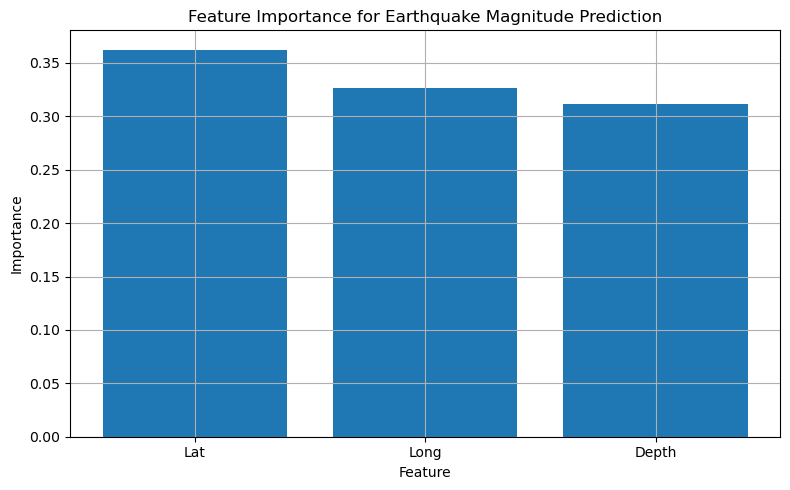

In [3]:
import matplotlib.pyplot as plt

# Assuming you already have a trained model and your features defined
importances = model.feature_importances_
feature_names = X.columns

# Plot the feature importances
plt.figure(figsize=(8, 5))
plt.bar(feature_names, importances)
plt.title('Feature Importance for Earthquake Magnitude Prediction')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.grid(True)
plt.tight_layout()
plt.show()

In [5]:
# Example: Predict magnitude for a custom earthquake location
custom_input = pd.DataFrame({
    'Lat': [28.5],
    'Long': [77.2],
    'Depth': [10]
})

predicted_magnitude = model.predict(custom_input)[0]
print(f"Predicted Magnitude: {predicted_magnitude:.2f}")


Predicted Magnitude: 2.23


In [7]:
# Assuming X and y are still available in your notebook
import joblib

model = RandomForestRegressor(random_state=42)
model.fit(X, y)

# Save the model to a file
joblib.dump(model, 'earthquake_magnitude_model.pkl')
print("Model saved as 'earthquake_magnitude_model.pkl'")

Model saved as 'earthquake_magnitude_model.pkl'


In [ ]:
# Load the model from file
loaded_model = joblib.load('earthquake_magnitude_model.pkl')


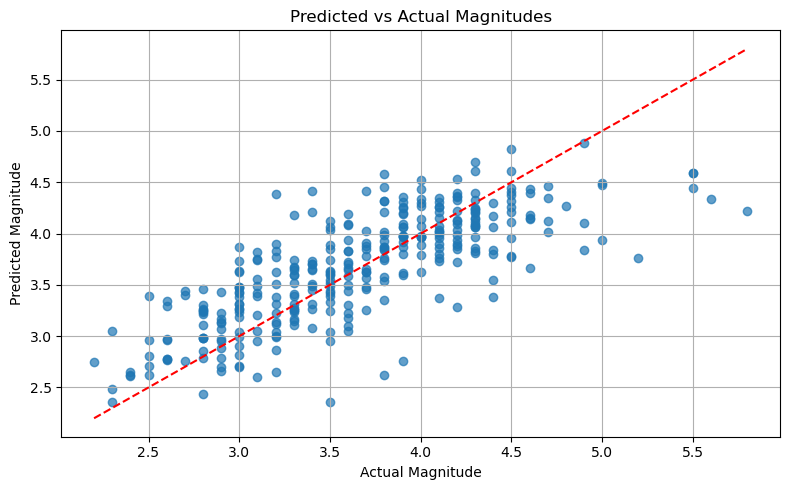

In [9]:
import matplotlib.pyplot as plt

# Plot predicted vs actual magnitudes
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Predicted vs Actual Magnitudes')
plt.xlabel('Actual Magnitude')
plt.ylabel('Predicted Magnitude')
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
#This graph shows how close your predictions are to the actual values. The red dashed line is the ideal line where prediction = actual.